## Analysis of frequent words in Reviews

In [2]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [3]:
from utils import read_json_file, get_all_text_data

In [4]:
reviews =  read_json_file(path="../data/reviews.json")

In [7]:
text_rating = get_all_text_data(reviews['data'], rating=True)
text, rating = zip(*text_rating)
rating_text_dict = {key:[] for key in list(["good","bad"])}

for text, rating in text_rating:
    key = "good" if rating>=4 else "bad"
    rating_text_dict[key].append(text)

100%|██████████| 855/855 [00:00<00:00, 121534.89it/s]


In [8]:
from collections import defaultdict
def get_nouns_by_freq(rating_text_dict,nlp,rating_value):
    texts = rating_text_dict[rating_value]
    docs = [nlp(text) for text in texts]

    freq_nouns = defaultdict(int)
    associated_adjectives = defaultdict(list)

    for doc in docs:
        for token in doc:
            if not (token.is_stop or token.is_punct) and token.pos_=="NOUN":
                freq_nouns[token.lemma_]+=1

                for child in token.children:
                    if not (child.is_punct or child.is_stop) and child.pos_ == 'ADJ':
                        associated_adjectives[token.lemma_].append(child.lemma_)

    sorted_nouns_by_freq = sorted(freq_nouns.items(), key = lambda x:x[1], reverse = True)
    words, frequencies = zip(*sorted_nouns_by_freq)

    return words, frequencies, associated_adjectives

In [9]:
import matplotlib.pyplot as plt
def plot_words_frequencies(words, frequencies, rating_value, top_n):
    plt.figure(figsize=(12, 8))
    plt.bar(words[:top_n], frequencies[:top_n], color='skyblue')

    plt.xlabel('Words')
    plt.ylabel('Frequencies')
    plt.title(f'Top {top_n} Word Frequencies for Rating Value of {rating_value}')
    plt.xticks(rotation=90)  
    plt.tight_layout()

    plt.show()

In [10]:
from collections import Counter
def plot_associated_adjectives(parent_words,associated_adjectives,top_n=3):
    
    plt.figure(figsize=(16,4))
   

    for idx, word in enumerate(parent_words):
        all_child_words = associated_adjectives[word]
        if all_child_words==[]:
            continue
        sorted_freq_child_words = sorted(Counter(all_child_words).items(), key=lambda x:x[1], reverse=True)
        adjective_words, freq = zip(*sorted_freq_child_words)

        num_plots = top_n

        
        plt.subplot(1,4,idx+1)
        plt.bar(adjective_words[:top_n],freq[:top_n],color="purple")
        plt.xlabel("Words")
        plt.ylabel("Frequencies")
        plt.title(f"Top {top_n} word associated with {word}" )

In [11]:
def plots_for_all_rating(rating_text_dict=rating_text_dict, nlp=nlp, top_n=10, rating_values=["good", "bad"]):
    for value in rating_values:
        words, frequencies, associated_adjectives = get_nouns_by_freq(rating_text_dict=rating_text_dict, nlp=nlp, rating_value=value)
        plot_words_frequencies(words=words, frequencies=frequencies, rating_value=value, top_n=top_n)
        plot_associated_adjectives(words[:4],associated_adjectives)
        

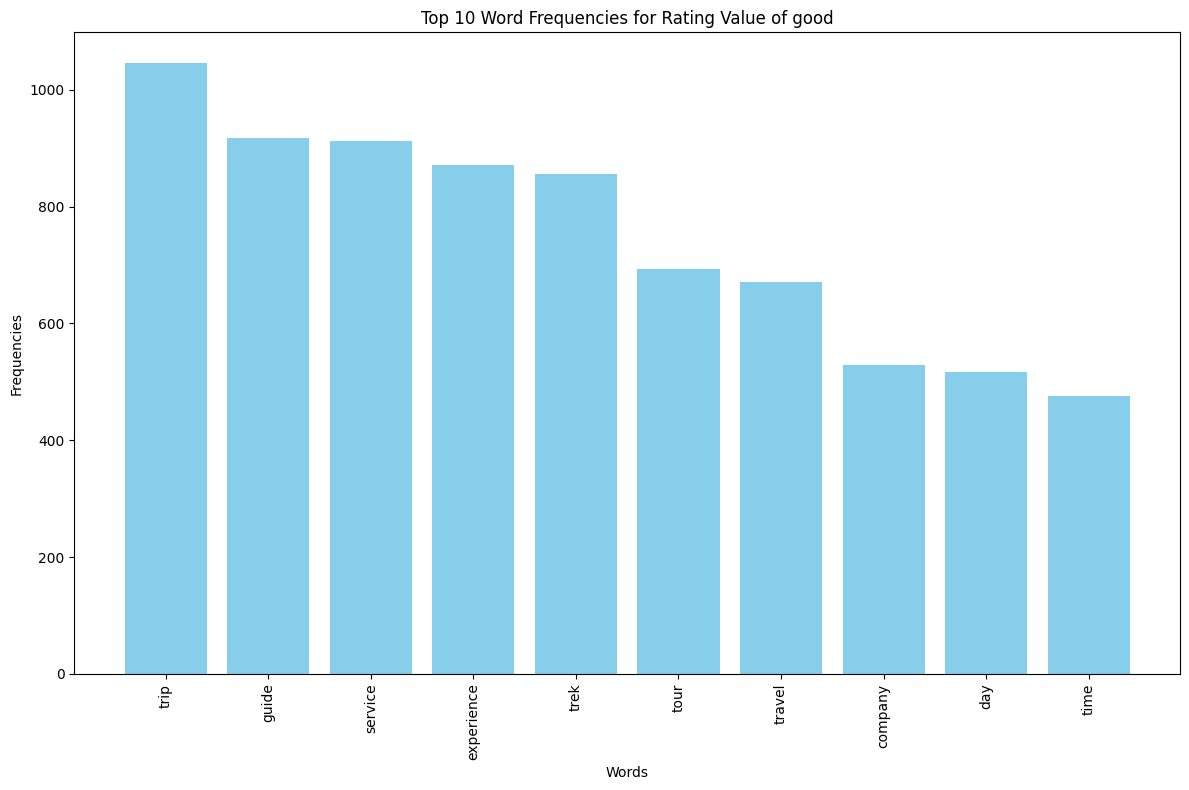

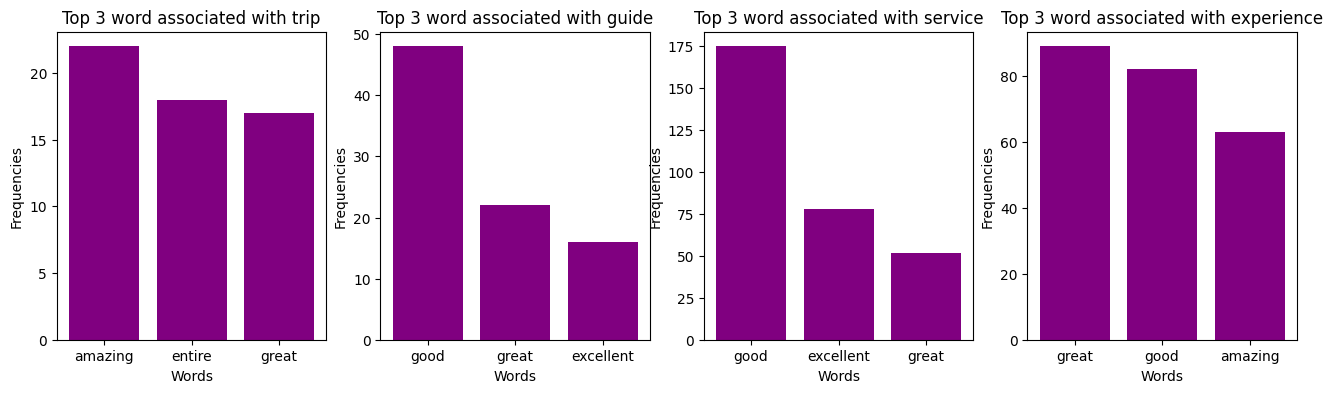

In [13]:
plots_for_all_rating(rating_text_dict, nlp, 10,rating_values=["good"])